<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [9]:
import os
import pandas as pd

# Download latest version
path = "./covid_19_clean_complete.csv"

print("Path to dataset files:", path)

Path to dataset files: ./covid_19_clean_complete.csv


In [10]:
if os.path.isdir(path):
  print(True)



df = pd.read_csv(path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [12]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [13]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

In [14]:
df.columns
print(len(df))

49068


In [15]:
df["Date"]

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
49063    2020-07-27
49064    2020-07-27
49065    2020-07-27
49066    2020-07-27
49067    2020-07-27
Name: Date, Length: 49068, dtype: object

In [18]:
# put your answer here
confirmed_cases = df.groupby("Date")["Confirmed"].sum()


<Axes: title={'center': 'Confirmed cases over time'}, xlabel='Date', ylabel='Confirmed cases'>

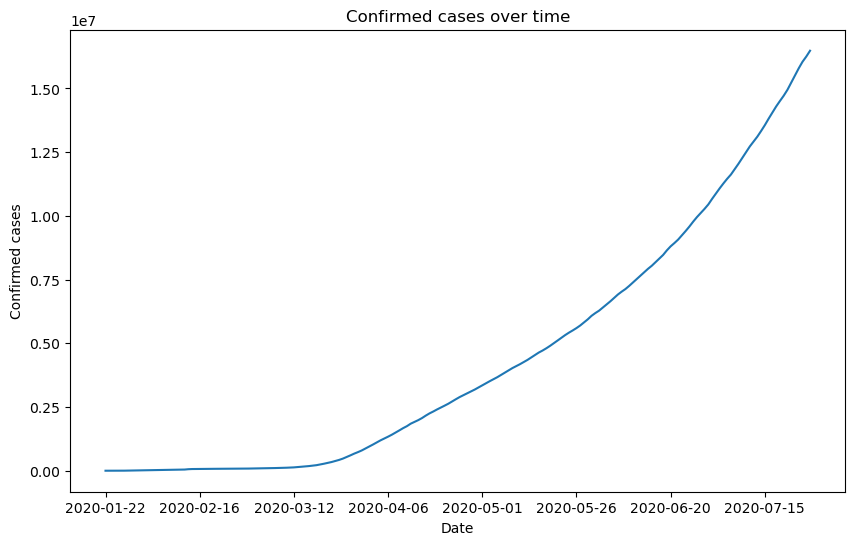

In [46]:
confirmed_cases.plot(kind="line", figsize=(10, 6), title="Confirmed cases over time", ylabel="Confirmed cases")

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

In [ ]:
# put your answer here
print(df["Country/Region"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Greenland' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait' 'Kyrgyzstan'
 'Latvia' 'Lebanon' 'Liberia' 

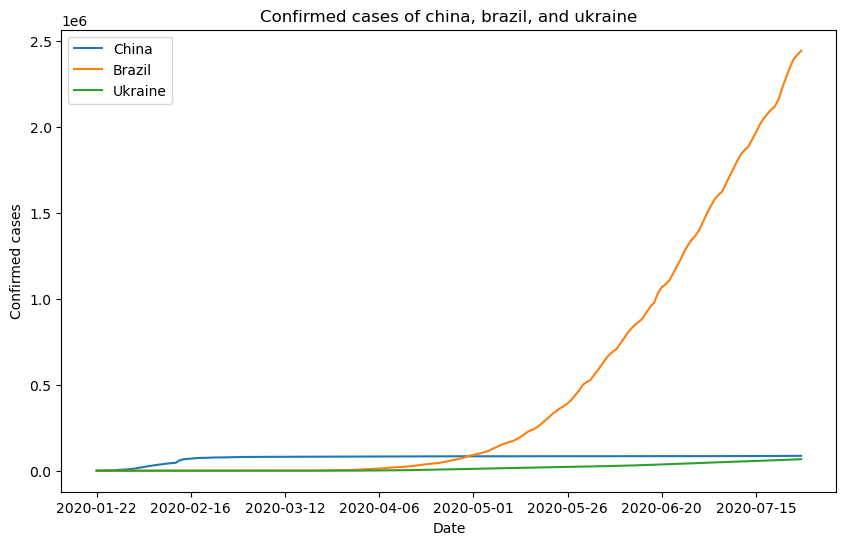

In [71]:
countries = ["China", "Brazil", "Ukraine"]

df_3 = df[df["Country/Region"].isin(countries)]
confirmed_cases_3 = df_3.groupby(["Date", "Country/Region"])["Confirmed"].sum().unstack()

for country in countries:
    confirmed_cases_3[country].plot(kind="line", legend=True, figsize=(10,6), title="Confirmed cases of china, brazil, and ukraine", ylabel="Confirmed cases")

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

<Axes: title={'center': 'Active and recovered cases in Philippines'}, xlabel='Date', ylabel='Cases'>

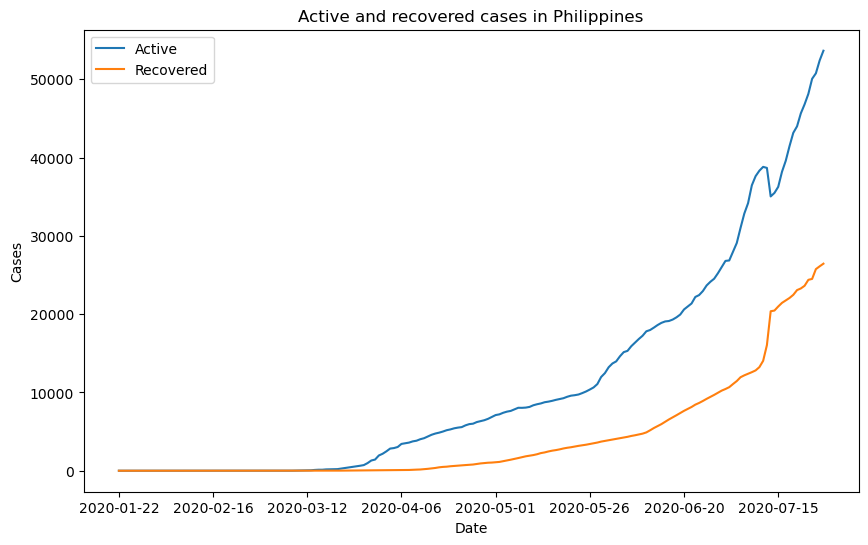

In [42]:
# put your answer here
df_ph = df[df["Country/Region"] == "Philippines"]
grouped_ph = df_ph.groupby('Date')[['Active', 'Recovered']].sum()

grouped_ph[["Active", "Recovered"]].plot(kind="line", figsize=(10, 6), legend=True, title="Active and recovered cases in Philippines", ylabel="Cases")

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

<Axes: title={'center': 'Confirmed cases from top 10 countries 2020-01-22'}, xlabel='Country', ylabel='Confirmed cases'>

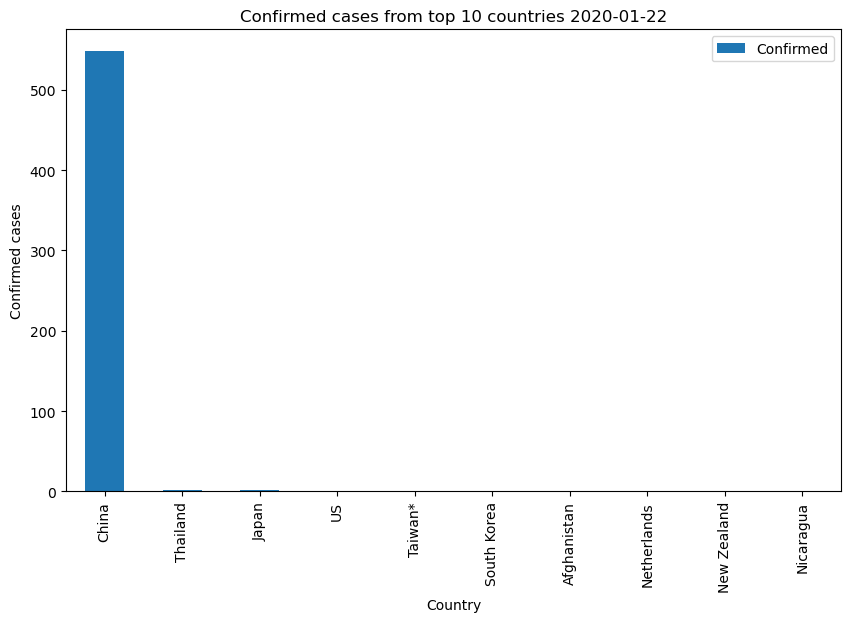

In [43]:
# put your answer here
d = "2020-01-22"
df[df['Date'] == d].groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10, 6), legend=True, title="Confirmed cases from top 10 countries " + d, ylabel="Confirmed cases", xlabel="Country")

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

<Axes: title={'center': 'Confirmed cases from WHO as of 2020-07-27'}, xlabel='Region', ylabel='Confirmed cases'>

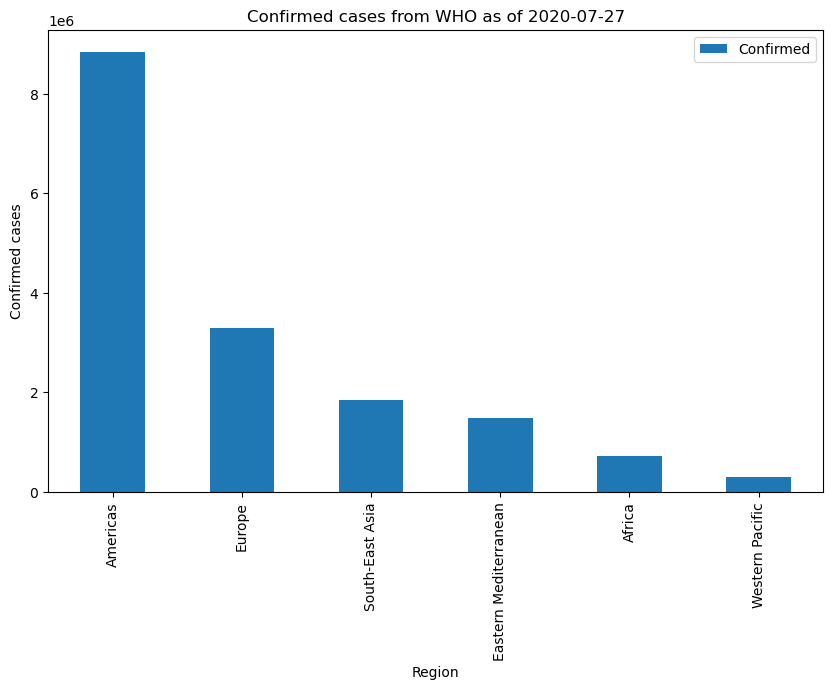

In [44]:
# put your answer here
df[df['Date'] == df["Date"].max()].groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 6), legend=True, title="Confirmed cases from WHO as of " + df["Date"].max(), ylabel="Confirmed cases", xlabel="Region")

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

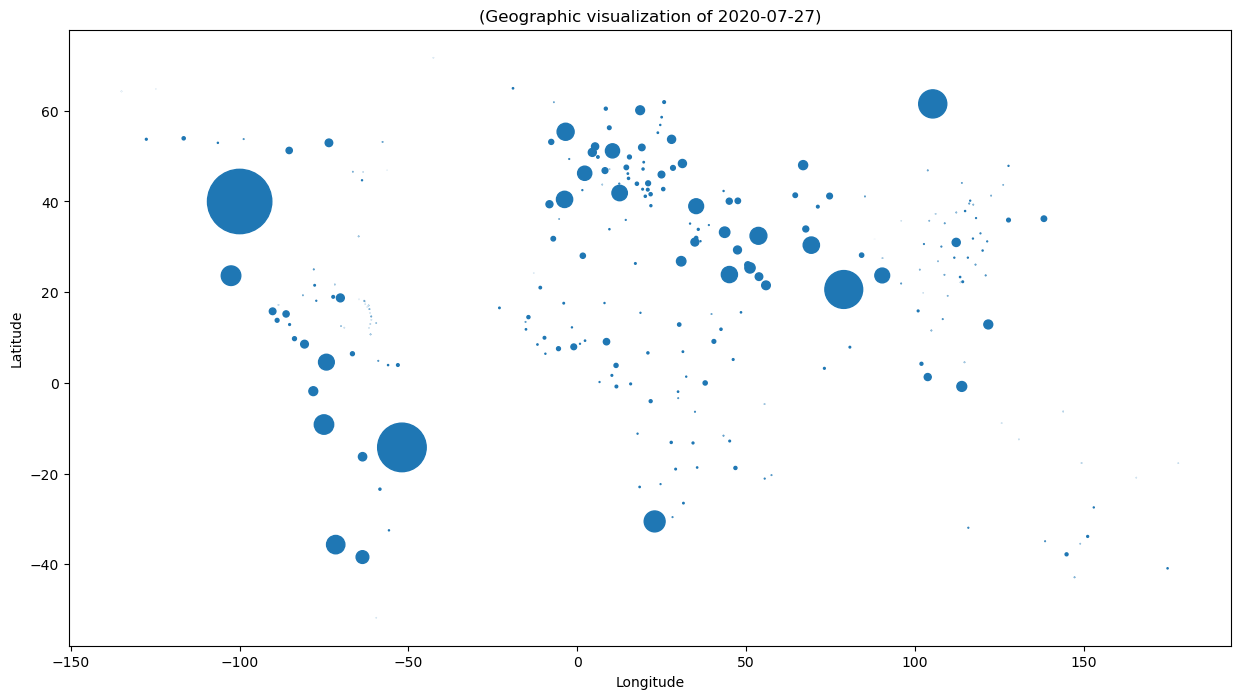

In [ ]:
import matplotlib.pyplot  as plt
latest_date = df['Date'].max()
gv = df[(df['Date'] == latest_date) & (df['Confirmed'] > 0)]

plt.figure(figsize=(15, 8))
sizes = gv['Confirmed'] / 2000

plt.scatter(gv['Long'], gv['Lat'], s=sizes)

plt.title(f'(Geographic visualization of {latest_date})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

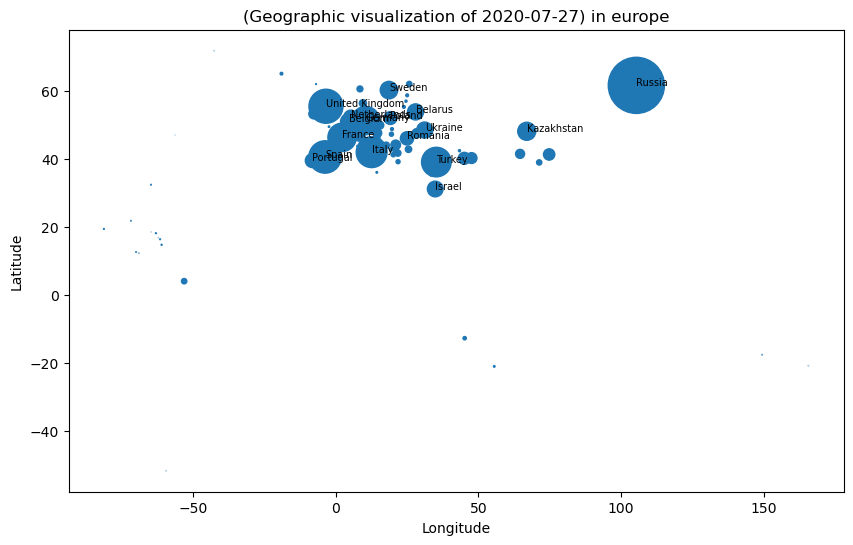

In [70]:
# put your answer here
ph = df[(df['Date'] == latest_date) & (df['WHO Region'] == "Europe") & (df['Confirmed'] > 0)]
sizes = ph['Confirmed'] / 500
plt.figure(figsize=(10, 6))

# Add country labels for context
plt.scatter(ph['Long'], ph['Lat'], s=sizes)

for i, txt in enumerate(ph['Country/Region']):
    if ph.iloc[i]['Confirmed'] > ph['Confirmed'].mean(): 
        plt.annotate(txt, (ph.iloc[i]['Long'], ph.iloc[i]['Lat']), fontsize=7)
plt.title(f'(Geographic visualization of {latest_date}) in europe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()